In [1]:
import sys

sys.path.append("..")

In [2]:
from tensorflow import keras

In [3]:
from utils.preprocessing_utils import PreprocessingUtils

In [4]:
from utils.model_wrapper import ModelWrapper

In [5]:
preprocessing_utils = PreprocessingUtils()

Files already exist, skipping...
Loading images and labels...
Images and labels loaded successfully!
Preprocessing labels...
Labels preprocessed successfully!
Splitting data into train, test and validation sets...
Data split successfully!


In [6]:
def build_inceptionV3(model_name: str):
    model = keras.models.Sequential(
        name=model_name,
        layers=[
            keras.applications.inception_v3.InceptionV3(
                weights="imagenet", include_top=False, input_shape=preprocessing_utils.images.shape[1:]
            ),
            keras.layers.GlobalAveragePooling2D(),
            keras.layers.Dense(128, activation="relu"),
            keras.layers.Dropout(0.2),
            keras.layers.Dense(
                preprocessing_utils.num_classes, kernel_regularizer=keras.regularizers.l2(0.01), activation="softmax"
            ),
        ],
    )

    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )

    model.summary()

    return model

In [7]:
inceptionV3_wrapper = ModelWrapper("InceptionV3", preprocessing_utils=preprocessing_utils)

In [8]:
inceptionV3_wrapper.build_model(build_fn=build_inceptionV3, model_name=inceptionV3_wrapper.model_name)

Building model...
Model: "InceptionV3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 25)                3225      
                                                                 
Total params: 22,068,281
Trainable params: 22,033,849
Non-trainable params: 34,432
____________________

In [9]:
inceptionV3_wrapper.train_evaluate_and_save_model(
    batch_size=32,
    callbacks=[keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)],  # type: ignore
)

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 3.6158 - accuracy: 0.0698
Epoch 1: val_loss improved from inf to 3.53488, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 47s 291ms/step - loss: 3.6158 - accuracy: 0.0698 - val_loss: 3.5349 - val_accuracy: 0.0829 - lr: 1.0000e-04
Epoch 2/100
129/129 [==============================] - ETA: 0s - loss: 3.4276 - accuracy: 0.1408
Epoch 2: val_loss improved from 3.53488 to 3.39396, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 276ms/step - loss: 3.4276 - accuracy: 0.1408 - val_loss: 3.3940 - val_accuracy: 0.1521 - lr: 1.0000e-04
Epoch 3/100
128/129 [============================>.] - ETA: 0s - loss: 3.2740 - accuracy: 0.2107
Epoch 3: val_loss improved from 3.39396 to 3.28568, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 3.2744 - accuracy: 0.2104 - val_loss: 3.2857 - val_accuracy: 0.2028 - lr: 1.0000e-04
Epoch 4/100
128/129 [============================>.] - ETA: 0s - loss: 3.1187 - accuracy: 0.2783
Epoch 4: val_loss improved from 3.28568 to 3.16005, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 279ms/step - loss: 3.1190 - accuracy: 0.2783 - val_loss: 3.1600 - val_accuracy: 0.2442 - lr: 1.0000e-04
Epoch 5/100
128/129 [============================>.] - ETA: 0s - loss: 2.9635 - accuracy: 0.3167
Epoch 5: val_loss improved from 3.16005 to 3.02514, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 186ms/step - loss: 2.9629 - accuracy: 0.3167 - val_loss: 3.0251 - val_accuracy: 0.2857 - lr: 1.0000e-04
Epoch 6/100
129/129 [==============================] - ETA: 0s - loss: 2.7974 - accuracy: 0.3712
Epoch 6: val_loss improved from 3.02514 to 2.89272, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 2.7974 - accuracy: 0.3712 - val_loss: 2.8927 - val_accuracy: 0.3041 - lr: 1.0000e-04
Epoch 7/100
129/129 [==============================] - ETA: 0s - loss: 2.6235 - accuracy: 0.4279
Epoch 7: val_loss improved from 2.89272 to 2.75411, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 32s 250ms/step - loss: 2.6235 - accuracy: 0.4279 - val_loss: 2.7541 - val_accuracy: 0.3548 - lr: 1.0000e-04
Epoch 8/100
128/129 [============================>.] - ETA: 0s - loss: 2.4667 - accuracy: 0.4766
Epoch 8: val_loss improved from 2.75411 to 2.62421, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 2.4668 - accuracy: 0.4763 - val_loss: 2.6242 - val_accuracy: 0.4470 - lr: 1.0000e-04
Epoch 9/100
129/129 [==============================] - ETA: 0s - loss: 2.2996 - accuracy: 0.5317
Epoch 9: val_loss improved from 2.62421 to 2.49951, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 2.2996 - accuracy: 0.5317 - val_loss: 2.4995 - val_accuracy: 0.4608 - lr: 1.0000e-04
Epoch 10/100
129/129 [==============================] - ETA: 0s - loss: 2.1653 - accuracy: 0.5653
Epoch 10: val_loss improved from 2.49951 to 2.37942, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 271ms/step - loss: 2.1653 - accuracy: 0.5653 - val_loss: 2.3794 - val_accuracy: 0.5069 - lr: 1.0000e-04
Epoch 11/100
128/129 [============================>.] - ETA: 0s - loss: 2.0146 - accuracy: 0.6086
Epoch 11: val_loss improved from 2.37942 to 2.26800, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 181ms/step - loss: 2.0147 - accuracy: 0.6084 - val_loss: 2.2680 - val_accuracy: 0.5530 - lr: 1.0000e-04
Epoch 12/100
128/129 [============================>.] - ETA: 0s - loss: 1.8888 - accuracy: 0.6372
Epoch 12: val_loss improved from 2.26800 to 2.17814, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 1.8910 - accuracy: 0.6363 - val_loss: 2.1781 - val_accuracy: 0.5576 - lr: 1.0000e-04
Epoch 13/100
128/129 [============================>.] - ETA: 0s - loss: 1.7882 - accuracy: 0.6699
Epoch 13: val_loss improved from 2.17814 to 2.09189, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 185ms/step - loss: 1.7894 - accuracy: 0.6697 - val_loss: 2.0919 - val_accuracy: 0.5668 - lr: 1.0000e-04
Epoch 14/100
128/129 [============================>.] - ETA: 0s - loss: 1.6588 - accuracy: 0.7114
Epoch 14: val_loss improved from 2.09189 to 2.01211, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 182ms/step - loss: 1.6593 - accuracy: 0.7110 - val_loss: 2.0121 - val_accuracy: 0.5945 - lr: 1.0000e-04
Epoch 15/100
128/129 [============================>.] - ETA: 0s - loss: 1.5607 - accuracy: 0.7314
Epoch 15: val_loss improved from 2.01211 to 1.94070, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 30s 233ms/step - loss: 1.5605 - accuracy: 0.7322 - val_loss: 1.9407 - val_accuracy: 0.6037 - lr: 1.0000e-04
Epoch 16/100
129/129 [==============================] - ETA: 0s - loss: 1.4583 - accuracy: 0.7675
Epoch 16: val_loss improved from 1.94070 to 1.87797, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 31s 237ms/step - loss: 1.4583 - accuracy: 0.7675 - val_loss: 1.8780 - val_accuracy: 0.6267 - lr: 1.0000e-04
Epoch 17/100
128/129 [============================>.] - ETA: 0s - loss: 1.3872 - accuracy: 0.7825
Epoch 17: val_loss improved from 1.87797 to 1.82082, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 276ms/step - loss: 1.3864 - accuracy: 0.7825 - val_loss: 1.8208 - val_accuracy: 0.6359 - lr: 1.0000e-04
Epoch 18/100
129/129 [==============================] - ETA: 0s - loss: 1.2958 - accuracy: 0.8117
Epoch 18: val_loss improved from 1.82082 to 1.76843, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 1.2958 - accuracy: 0.8117 - val_loss: 1.7684 - val_accuracy: 0.6590 - lr: 1.0000e-04
Epoch 19/100
129/129 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.8280
Epoch 19: val_loss improved from 1.76843 to 1.72317, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 26s 197ms/step - loss: 1.2156 - accuracy: 0.8280 - val_loss: 1.7232 - val_accuracy: 0.6636 - lr: 1.0000e-04
Epoch 20/100
128/129 [============================>.] - ETA: 0s - loss: 1.1563 - accuracy: 0.8528
Epoch 20: val_loss improved from 1.72317 to 1.68077, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 33s 254ms/step - loss: 1.1574 - accuracy: 0.8519 - val_loss: 1.6808 - val_accuracy: 0.6728 - lr: 1.0000e-04
Epoch 21/100
129/129 [==============================] - ETA: 0s - loss: 1.0866 - accuracy: 0.8701
Epoch 21: val_loss improved from 1.68077 to 1.63576, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 283ms/step - loss: 1.0866 - accuracy: 0.8701 - val_loss: 1.6358 - val_accuracy: 0.6820 - lr: 1.0000e-04
Epoch 22/100
129/129 [==============================] - ETA: 0s - loss: 1.0382 - accuracy: 0.8803
Epoch 22: val_loss improved from 1.63576 to 1.61265, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 1.0382 - accuracy: 0.8803 - val_loss: 1.6127 - val_accuracy: 0.6820 - lr: 1.0000e-04
Epoch 23/100
129/129 [==============================] - ETA: 0s - loss: 0.9744 - accuracy: 0.8925
Epoch 23: val_loss improved from 1.61265 to 1.58445, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 194ms/step - loss: 0.9744 - accuracy: 0.8925 - val_loss: 1.5844 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 24/100
128/129 [============================>.] - ETA: 0s - loss: 0.9215 - accuracy: 0.9116
Epoch 24: val_loss improved from 1.58445 to 1.55944, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 183ms/step - loss: 0.9223 - accuracy: 0.9117 - val_loss: 1.5594 - val_accuracy: 0.6912 - lr: 1.0000e-04
Epoch 25/100
128/129 [============================>.] - ETA: 0s - loss: 0.8904 - accuracy: 0.9185
Epoch 25: val_loss improved from 1.55944 to 1.52537, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 184ms/step - loss: 0.8917 - accuracy: 0.9185 - val_loss: 1.5254 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 26/100
128/129 [============================>.] - ETA: 0s - loss: 0.8471 - accuracy: 0.9297
Epoch 26: val_loss improved from 1.52537 to 1.49967, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 27s 211ms/step - loss: 0.8484 - accuracy: 0.9290 - val_loss: 1.4997 - val_accuracy: 0.7005 - lr: 1.0000e-04
Epoch 27/100
129/129 [==============================] - ETA: 0s - loss: 0.8182 - accuracy: 0.9399
Epoch 27: val_loss improved from 1.49967 to 1.47668, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 0.8182 - accuracy: 0.9399 - val_loss: 1.4767 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 28/100
129/129 [==============================] - ETA: 0s - loss: 0.7729 - accuracy: 0.9501
Epoch 28: val_loss improved from 1.47668 to 1.45630, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 0.7729 - accuracy: 0.9501 - val_loss: 1.4563 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 29/100
129/129 [==============================] - ETA: 0s - loss: 0.7420 - accuracy: 0.9506
Epoch 29: val_loss improved from 1.45630 to 1.44518, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.7420 - accuracy: 0.9506 - val_loss: 1.4452 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 30/100
129/129 [==============================] - ETA: 0s - loss: 0.7318 - accuracy: 0.9569
Epoch 30: val_loss improved from 1.44518 to 1.41964, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 26s 200ms/step - loss: 0.7318 - accuracy: 0.9569 - val_loss: 1.4196 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 31/100
128/129 [============================>.] - ETA: 0s - loss: 0.6968 - accuracy: 0.9570
Epoch 31: val_loss improved from 1.41964 to 1.41019, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 24s 187ms/step - loss: 0.6976 - accuracy: 0.9562 - val_loss: 1.4102 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 32/100
129/129 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.9650
Epoch 32: val_loss improved from 1.41019 to 1.39313, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.6801 - accuracy: 0.9650 - val_loss: 1.3931 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 33/100
129/129 [==============================] - ETA: 0s - loss: 0.6607 - accuracy: 0.9703
Epoch 33: val_loss improved from 1.39313 to 1.38831, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 28s 218ms/step - loss: 0.6607 - accuracy: 0.9703 - val_loss: 1.3883 - val_accuracy: 0.7143 - lr: 1.0000e-04
Epoch 34/100
129/129 [==============================] - ETA: 0s - loss: 0.6419 - accuracy: 0.9749
Epoch 34: val_loss improved from 1.38831 to 1.38191, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.6419 - accuracy: 0.9749 - val_loss: 1.3819 - val_accuracy: 0.7097 - lr: 1.0000e-04
Epoch 35/100
129/129 [==============================] - ETA: 0s - loss: 0.6281 - accuracy: 0.9759
Epoch 35: val_loss improved from 1.38191 to 1.36548, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.6281 - accuracy: 0.9759 - val_loss: 1.3655 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 36/100
128/129 [============================>.] - ETA: 0s - loss: 0.6075 - accuracy: 0.9775
Epoch 36: val_loss improved from 1.36548 to 1.35781, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 25s 197ms/step - loss: 0.6073 - accuracy: 0.9776 - val_loss: 1.3578 - val_accuracy: 0.7189 - lr: 1.0000e-04
Epoch 37/100
129/129 [==============================] - ETA: 0s - loss: 0.6024 - accuracy: 0.9764
Epoch 37: val_loss improved from 1.35781 to 1.35076, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.6024 - accuracy: 0.9764 - val_loss: 1.3508 - val_accuracy: 0.7235 - lr: 1.0000e-04
Epoch 38/100
129/129 [==============================] - ETA: 0s - loss: 0.5808 - accuracy: 0.9822
Epoch 38: val_loss improved from 1.35076 to 1.34425, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.5808 - accuracy: 0.9822 - val_loss: 1.3442 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 39/100
129/129 [==============================] - ETA: 0s - loss: 0.5635 - accuracy: 0.9886
Epoch 39: val_loss improved from 1.34425 to 1.32913, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.5635 - accuracy: 0.9886 - val_loss: 1.3291 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 40/100
129/129 [==============================] - ETA: 0s - loss: 0.5587 - accuracy: 0.9842
Epoch 40: val_loss improved from 1.32913 to 1.31972, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 282ms/step - loss: 0.5587 - accuracy: 0.9842 - val_loss: 1.3197 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 41/100
129/129 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.9876
Epoch 41: val_loss improved from 1.31972 to 1.31831, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 284ms/step - loss: 0.5453 - accuracy: 0.9876 - val_loss: 1.3183 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 42/100
129/129 [==============================] - ETA: 0s - loss: 0.5363 - accuracy: 0.9878
Epoch 42: val_loss improved from 1.31831 to 1.31103, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.5363 - accuracy: 0.9878 - val_loss: 1.3110 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 43/100
129/129 [==============================] - ETA: 0s - loss: 0.5279 - accuracy: 0.9908
Epoch 43: val_loss improved from 1.31103 to 1.30339, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 0.5279 - accuracy: 0.9908 - val_loss: 1.3034 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 44/100
129/129 [==============================] - ETA: 0s - loss: 0.5168 - accuracy: 0.9900
Epoch 44: val_loss improved from 1.30339 to 1.30063, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 291ms/step - loss: 0.5168 - accuracy: 0.9900 - val_loss: 1.3006 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 45/100
128/129 [============================>.] - ETA: 0s - loss: 0.5168 - accuracy: 0.9917
Epoch 45: val_loss improved from 1.30063 to 1.29529, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 28s 214ms/step - loss: 0.5172 - accuracy: 0.9915 - val_loss: 1.2953 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 46/100
129/129 [==============================] - ETA: 0s - loss: 0.5074 - accuracy: 0.9910
Epoch 46: val_loss improved from 1.29529 to 1.29364, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.5074 - accuracy: 0.9910 - val_loss: 1.2936 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 47/100
129/129 [==============================] - ETA: 0s - loss: 0.4969 - accuracy: 0.9925
Epoch 47: val_loss improved from 1.29364 to 1.28822, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.4969 - accuracy: 0.9925 - val_loss: 1.2882 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 48/100
129/129 [==============================] - ETA: 0s - loss: 0.4915 - accuracy: 0.9939
Epoch 48: val_loss improved from 1.28822 to 1.28293, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 284ms/step - loss: 0.4915 - accuracy: 0.9939 - val_loss: 1.2829 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 49/100
129/129 [==============================] - ETA: 0s - loss: 0.4834 - accuracy: 0.9961
Epoch 49: val_loss improved from 1.28293 to 1.27934, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 288ms/step - loss: 0.4834 - accuracy: 0.9961 - val_loss: 1.2793 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 50/100
129/129 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.9944
Epoch 50: val_loss improved from 1.27934 to 1.27003, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 295ms/step - loss: 0.4813 - accuracy: 0.9944 - val_loss: 1.2700 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 51/100
129/129 [==============================] - ETA: 0s - loss: 0.4757 - accuracy: 0.9946
Epoch 51: val_loss improved from 1.27003 to 1.26261, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 292ms/step - loss: 0.4757 - accuracy: 0.9946 - val_loss: 1.2626 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 52/100
129/129 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.9956
Epoch 52: val_loss improved from 1.26261 to 1.26105, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4665 - accuracy: 0.9956 - val_loss: 1.2610 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 53/100
129/129 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.9956
Epoch 53: val_loss improved from 1.26105 to 1.25963, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4665 - accuracy: 0.9956 - val_loss: 1.2596 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 54/100
129/129 [==============================] - ETA: 0s - loss: 0.4600 - accuracy: 0.9964
Epoch 54: val_loss improved from 1.25963 to 1.25283, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 292ms/step - loss: 0.4600 - accuracy: 0.9964 - val_loss: 1.2528 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 55/100
128/129 [============================>.] - ETA: 0s - loss: 0.4494 - accuracy: 0.9976
Epoch 55: val_loss improved from 1.25283 to 1.24903, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 277ms/step - loss: 0.4497 - accuracy: 0.9976 - val_loss: 1.2490 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 56/100
129/129 [==============================] - ETA: 0s - loss: 0.4475 - accuracy: 0.9978
Epoch 56: val_loss improved from 1.24903 to 1.24899, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 298ms/step - loss: 0.4475 - accuracy: 0.9978 - val_loss: 1.2490 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 57/100
129/129 [==============================] - ETA: 0s - loss: 0.4522 - accuracy: 0.9954
Epoch 57: val_loss did not improve from 1.24899
129/129 [==============================] - 10s 74ms/step - loss: 0.4522 - accuracy: 0.9954 - val_loss: 1.2514 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 58/100
129/129 [==============================] - ETA: 0s - loss: 0.4500 - accuracy: 0.9959
Epoch 58: val_loss improved from 1.24899 to 1.24684, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 283ms/step - loss: 0.4500 - accuracy: 0.9959 - val_loss: 1.2468 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 59/100
129/129 [==============================] - ETA: 0s - loss: 0.4388 - accuracy: 0.9988
Epoch 59: val_loss improved from 1.24684 to 1.24395, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 0.4388 - accuracy: 0.9988 - val_loss: 1.2439 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 60/100
129/129 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.9983
Epoch 60: val_loss improved from 1.24395 to 1.24250, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4375 - accuracy: 0.9983 - val_loss: 1.2425 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 61/100
129/129 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.9966
Epoch 61: val_loss did not improve from 1.24250
129/129 [==============================] - 10s 74ms/step - loss: 0.4337 - accuracy: 0.9966 - val_loss: 1.2453 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 62/100
129/129 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.9990
Epoch 62: val_loss improved from 1.24250 to 1.23661, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 34s 265ms/step - loss: 0.4270 - accuracy: 0.9990 - val_loss: 1.2366 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 63/100
128/129 [============================>.] - ETA: 0s - loss: 0.4236 - accuracy: 0.9973
Epoch 63: val_loss improved from 1.23661 to 1.23538, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 35s 275ms/step - loss: 0.4238 - accuracy: 0.9973 - val_loss: 1.2354 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 64/100
129/129 [==============================] - ETA: 0s - loss: 0.4194 - accuracy: 0.9985
Epoch 64: val_loss improved from 1.23538 to 1.22981, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.4194 - accuracy: 0.9985 - val_loss: 1.2298 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 65/100
129/129 [==============================] - ETA: 0s - loss: 0.4181 - accuracy: 0.9973
Epoch 65: val_loss did not improve from 1.22981
129/129 [==============================] - 10s 74ms/step - loss: 0.4181 - accuracy: 0.9973 - val_loss: 1.2311 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 66/100
129/129 [==============================] - ETA: 0s - loss: 0.4209 - accuracy: 0.9973
Epoch 66: val_loss did not improve from 1.22981
129/129 [==============================] - 10s 74ms/step - loss: 0.4209 - accuracy: 0.9973 - val_loss: 1.2303 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 67/100
129/129 [==============================] - ETA: 0s - loss: 0.4175 - accuracy: 0.9985
Epoch 67: val_loss improved from 1.22981 to 1.22829, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 291ms/step - loss: 0.4175 - accuracy: 0.9985 - val_loss: 1.2283 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 68/100
129/129 [==============================] - ETA: 0s - loss: 0.4176 - accuracy: 0.9959
Epoch 68: val_loss improved from 1.22829 to 1.22359, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.4176 - accuracy: 0.9959 - val_loss: 1.2236 - val_accuracy: 0.7327 - lr: 1.0000e-04
Epoch 69/100
129/129 [==============================] - ETA: 0s - loss: 0.4125 - accuracy: 0.9976
Epoch 69: val_loss improved from 1.22359 to 1.22026, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4125 - accuracy: 0.9976 - val_loss: 1.2203 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 70/100
129/129 [==============================] - ETA: 0s - loss: 0.4094 - accuracy: 0.9981
Epoch 70: val_loss improved from 1.22026 to 1.21987, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.4094 - accuracy: 0.9981 - val_loss: 1.2199 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 71/100
129/129 [==============================] - ETA: 0s - loss: 0.4024 - accuracy: 0.9990
Epoch 71: val_loss improved from 1.21987 to 1.21326, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.4024 - accuracy: 0.9990 - val_loss: 1.2133 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 72/100
129/129 [==============================] - ETA: 0s - loss: 0.4019 - accuracy: 0.9993
Epoch 72: val_loss improved from 1.21326 to 1.21078, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.4019 - accuracy: 0.9993 - val_loss: 1.2108 - val_accuracy: 0.7373 - lr: 1.0000e-04
Epoch 73/100
129/129 [==============================] - ETA: 0s - loss: 0.3991 - accuracy: 0.9988
Epoch 73: val_loss improved from 1.21078 to 1.20944, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.3991 - accuracy: 0.9988 - val_loss: 1.2094 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 74/100
129/129 [==============================] - ETA: 0s - loss: 0.3947 - accuracy: 0.9983
Epoch 74: val_loss improved from 1.20944 to 1.20709, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 39s 300ms/step - loss: 0.3947 - accuracy: 0.9983 - val_loss: 1.2071 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 75/100
129/129 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.9988
Epoch 75: val_loss improved from 1.20709 to 1.20666, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 295ms/step - loss: 0.3929 - accuracy: 0.9988 - val_loss: 1.2067 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 76/100
129/129 [==============================] - ETA: 0s - loss: 0.3922 - accuracy: 0.9985
Epoch 76: val_loss improved from 1.20666 to 1.20659, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 292ms/step - loss: 0.3922 - accuracy: 0.9985 - val_loss: 1.2066 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 77/100
129/129 [==============================] - ETA: 0s - loss: 0.3896 - accuracy: 0.9985
Epoch 77: val_loss improved from 1.20659 to 1.20449, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 39s 299ms/step - loss: 0.3896 - accuracy: 0.9985 - val_loss: 1.2045 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 78/100
129/129 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.9993
Epoch 78: val_loss improved from 1.20449 to 1.20166, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.3859 - accuracy: 0.9993 - val_loss: 1.2017 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 79/100
129/129 [==============================] - ETA: 0s - loss: 0.3840 - accuracy: 0.9993
Epoch 79: val_loss improved from 1.20166 to 1.20162, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.3840 - accuracy: 0.9993 - val_loss: 1.2016 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 80/100
129/129 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.9988
Epoch 80: val_loss improved from 1.20162 to 1.19768, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3805 - accuracy: 0.9988 - val_loss: 1.1977 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 81/100
129/129 [==============================] - ETA: 0s - loss: 0.3830 - accuracy: 0.9983
Epoch 81: val_loss improved from 1.19768 to 1.19360, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 40s 311ms/step - loss: 0.3830 - accuracy: 0.9983 - val_loss: 1.1936 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 82/100
129/129 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.9990
Epoch 82: val_loss did not improve from 1.19360
129/129 [==============================] - 10s 73ms/step - loss: 0.3805 - accuracy: 0.9990 - val_loss: 1.1956 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 83/100
129/129 [==============================] - ETA: 0s - loss: 0.3779 - accuracy: 0.9993
Epoch 83: val_loss improved from 1.19360 to 1.19281, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3779 - accuracy: 0.9993 - val_loss: 1.1928 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 84/100
129/129 [==============================] - ETA: 0s - loss: 0.3775 - accuracy: 0.9985
Epoch 84: val_loss improved from 1.19281 to 1.18856, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 289ms/step - loss: 0.3775 - accuracy: 0.9985 - val_loss: 1.1886 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 85/100
129/129 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.9993
Epoch 85: val_loss improved from 1.18856 to 1.18623, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 294ms/step - loss: 0.3739 - accuracy: 0.9993 - val_loss: 1.1862 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 86/100
129/129 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.9993
Epoch 86: val_loss improved from 1.18623 to 1.18616, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3691 - accuracy: 0.9993 - val_loss: 1.1862 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 87/100
129/129 [==============================] - ETA: 0s - loss: 0.3719 - accuracy: 0.9981
Epoch 87: val_loss improved from 1.18616 to 1.18148, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.3719 - accuracy: 0.9981 - val_loss: 1.1815 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 88/100
129/129 [==============================] - ETA: 0s - loss: 0.3666 - accuracy: 0.9988
Epoch 88: val_loss improved from 1.18148 to 1.17894, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 285ms/step - loss: 0.3666 - accuracy: 0.9988 - val_loss: 1.1789 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 89/100
129/129 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.9995
Epoch 89: val_loss improved from 1.17894 to 1.17533, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3659 - accuracy: 0.9995 - val_loss: 1.1753 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 90/100
129/129 [==============================] - ETA: 0s - loss: 0.3653 - accuracy: 0.9998
Epoch 90: val_loss improved from 1.17533 to 1.16945, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3653 - accuracy: 0.9998 - val_loss: 1.1695 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 91/100
129/129 [==============================] - ETA: 0s - loss: 0.3618 - accuracy: 0.9990
Epoch 91: val_loss did not improve from 1.16945
129/129 [==============================] - 10s 75ms/step - loss: 0.3618 - accuracy: 0.9990 - val_loss: 1.1698 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 92/100
129/129 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.9998
Epoch 92: val_loss improved from 1.16945 to 1.16778, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 299ms/step - loss: 0.3587 - accuracy: 0.9998 - val_loss: 1.1678 - val_accuracy: 0.7419 - lr: 1.0000e-04
Epoch 93/100
129/129 [==============================] - ETA: 0s - loss: 0.3583 - accuracy: 1.0000
Epoch 93: val_loss did not improve from 1.16778
129/129 [==============================] - 10s 74ms/step - loss: 0.3583 - accuracy: 1.0000 - val_loss: 1.1684 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 94/100
129/129 [==============================] - ETA: 0s - loss: 0.3568 - accuracy: 0.9998
Epoch 94: val_loss improved from 1.16778 to 1.16628, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 36s 284ms/step - loss: 0.3568 - accuracy: 0.9998 - val_loss: 1.1663 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 95/100
129/129 [==============================] - ETA: 0s - loss: 0.3542 - accuracy: 0.9998
Epoch 95: val_loss improved from 1.16628 to 1.16204, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 290ms/step - loss: 0.3542 - accuracy: 0.9998 - val_loss: 1.1620 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 96/100
129/129 [==============================] - ETA: 0s - loss: 0.3519 - accuracy: 0.9998
Epoch 96: val_loss improved from 1.16204 to 1.15979, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 291ms/step - loss: 0.3519 - accuracy: 0.9998 - val_loss: 1.1598 - val_accuracy: 0.7512 - lr: 1.0000e-04
Epoch 97/100
129/129 [==============================] - ETA: 0s - loss: 0.3494 - accuracy: 0.9995
Epoch 97: val_loss improved from 1.15979 to 1.15838, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 286ms/step - loss: 0.3494 - accuracy: 0.9995 - val_loss: 1.1584 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 98/100
129/129 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.9993
Epoch 98: val_loss improved from 1.15838 to 1.15556, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 38s 297ms/step - loss: 0.3525 - accuracy: 0.9993 - val_loss: 1.1556 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 99/100
129/129 [==============================] - ETA: 0s - loss: 0.3465 - accuracy: 1.0000
Epoch 99: val_loss improved from 1.15556 to 1.15243, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


129/129 [==============================] - 37s 287ms/step - loss: 0.3465 - accuracy: 1.0000 - val_loss: 1.1524 - val_accuracy: 0.7558 - lr: 1.0000e-04
Epoch 100/100
129/129 [==============================] - ETA: 0s - loss: 0.3451 - accuracy: 0.9995
Epoch 100: val_loss improved from 1.15243 to 1.15211, saving model to ../../artifacts/checkpoints\checkpoint_InceptionV3


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


INFO:tensorflow:Assets written to: ../../artifacts/checkpoints\checkpoint_InceptionV3\assets


20/20 [==============================] - 1s 41ms/step - loss: 1.1001 - accuracy: 0.7706
Saving model to "artifacts/models/InceptionV3.h5"...
Model saved successfully!


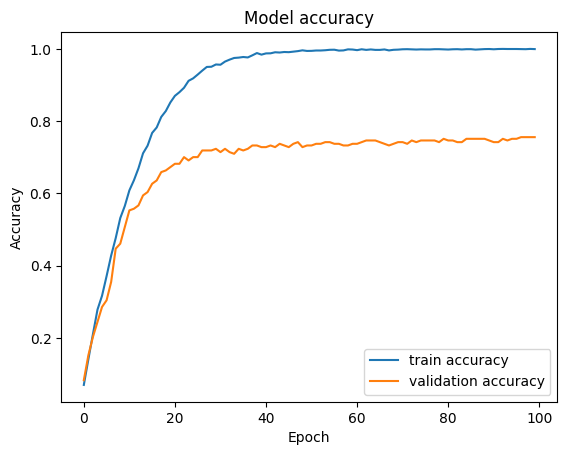

In [10]:
inceptionV3_wrapper.plot_accuracy()

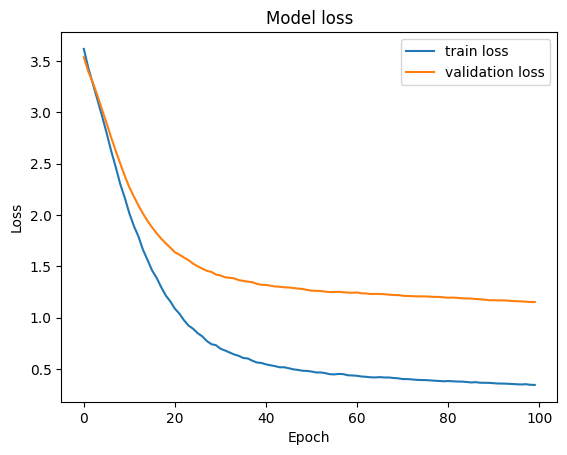

In [11]:
inceptionV3_wrapper.plot_loss()

20/20 [==============================] - 2s 26ms/step


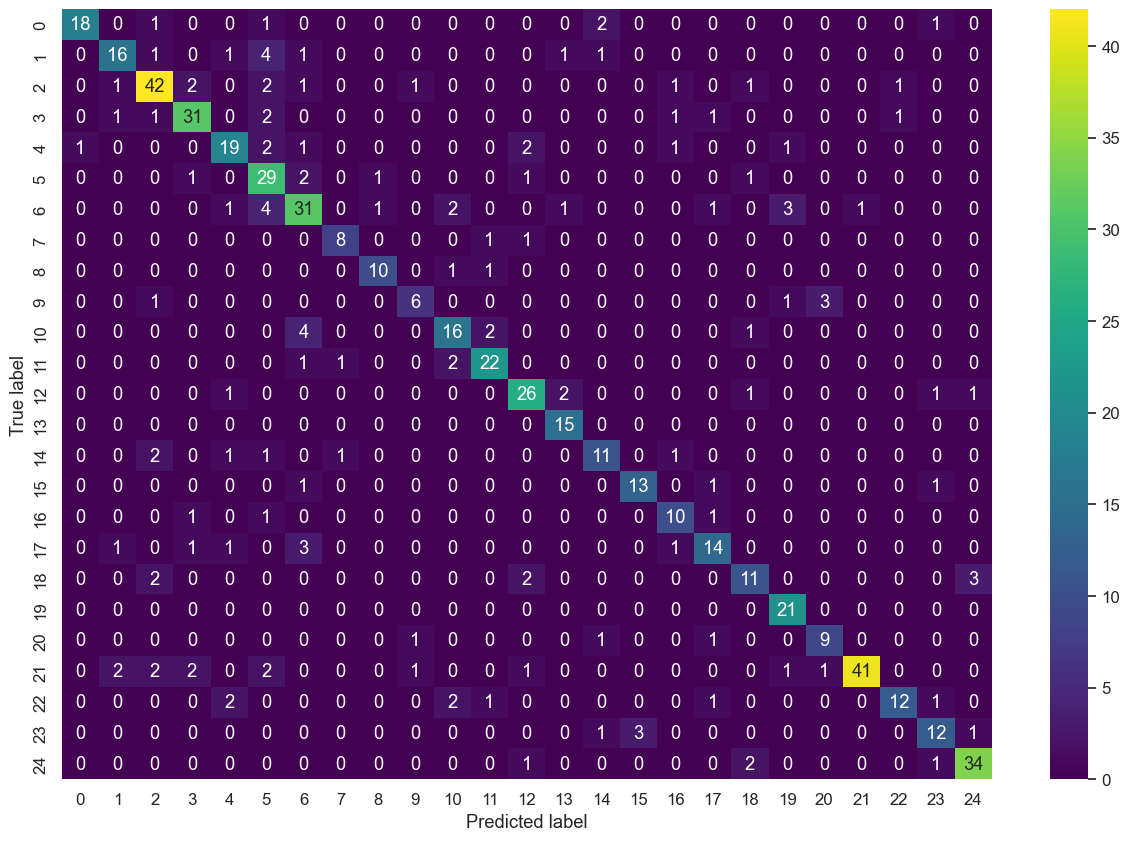

In [12]:
inceptionV3_wrapper.display_confusion_matrix()